In [14]:
#데이터셋 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [15]:
#모델을 만드는 함수 작성
def model_fn(a_layer=None):
  model = keras.Sequential()      #model 객체 생성
  model.add(keras.layers.Flatten(input_shape=(28, 28)))     #첫 입력 형태
  model.add(keras.layers.Dense(100, activation='relu'))     #은닉층의 활성함수는 ReLU로
  if a_layer:     #a_layer의 값이 None이 아니면
    model.add(a_layer)      #model에 a_layer를 덧붙임
  model.add(keras.layers.Dense(10, activation='softmax'))     #출력층의 활성함수는 softmax로
  return model      #완성된 model을 반환함

In [16]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
#fit()매서드의 결과를 history에 담음
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)      #verbose : 훈련과정 출력 조절. 0-나타내지 않음 / 1(기본값)-진행막대와 함께 손실 등의 지표 출력 / 2=진행막대 빼고 출력

Epoch 1/5
1500/1500 - 3s - loss: 2.9442 - accuracy: 0.6706
Epoch 2/5
1500/1500 - 3s - loss: 0.8558 - accuracy: 0.7204
Epoch 3/5
1500/1500 - 3s - loss: 0.8069 - accuracy: 0.7389
Epoch 4/5
1500/1500 - 3s - loss: 0.7703 - accuracy: 0.7505
Epoch 5/5
1500/1500 - 3s - loss: 0.7556 - accuracy: 0.7591


In [18]:
#fit() 메서드는 history 클래스 객체를 반환한다. history 객체에는 훈련 과정에서 계산한 지표값이 저장되어 있다.
print(history.history.keys())     #history 객체 안에는 손실과 정확도가 포함되어 있음을 확인(compile 메서드에서 accuracy를 추가했기 때문)

dict_keys(['loss', 'accuracy'])


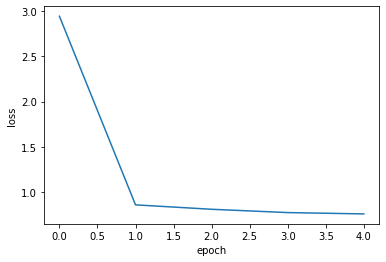

In [19]:
#history 속성을 이용해 에포크별 손실과 정확도를 출력
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

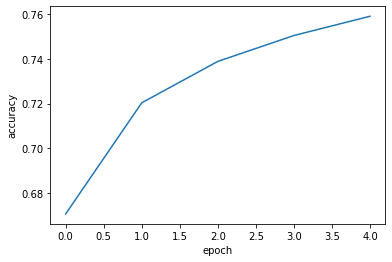

In [20]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [21]:
#에포크를 늘려 비교해봄
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 3s - loss: 0.7978 - accuracy: 0.7628
Epoch 2/20
1500/1500 - 3s - loss: 0.7541 - accuracy: 0.7689
Epoch 3/20
1500/1500 - 3s - loss: 0.7425 - accuracy: 0.7721
Epoch 4/20
1500/1500 - 3s - loss: 0.7760 - accuracy: 0.7786
Epoch 5/20
1500/1500 - 3s - loss: 0.7669 - accuracy: 0.7870
Epoch 6/20
1500/1500 - 3s - loss: 0.7616 - accuracy: 0.7937
Epoch 7/20
1500/1500 - 3s - loss: 0.7216 - accuracy: 0.7996
Epoch 8/20
1500/1500 - 3s - loss: 0.7325 - accuracy: 0.8015
Epoch 9/20
1500/1500 - 3s - loss: 0.7411 - accuracy: 0.8011
Epoch 10/20
1500/1500 - 3s - loss: 0.7405 - accuracy: 0.8065
Epoch 11/20
1500/1500 - 3s - loss: 0.7444 - accuracy: 0.8074
Epoch 12/20
1500/1500 - 3s - loss: 0.7647 - accuracy: 0.8086
Epoch 13/20
1500/1500 - 3s - loss: 0.7630 - accuracy: 0.8099
Epoch 14/20
1500/1500 - 3s - loss: 0.7513 - accuracy: 0.8097
Epoch 15/20
1500/1500 - 3s - loss: 0.7314 - accuracy: 0.8107
Epoch 16/20
1500/1500 - 3s - loss: 0.7196 - accuracy: 0.8112
Epoch 17/20
1500/1500 - 3s - loss

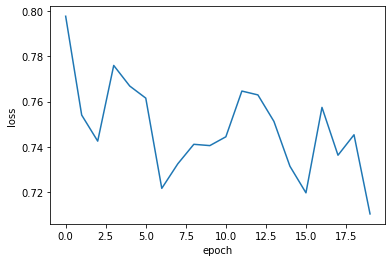

In [22]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

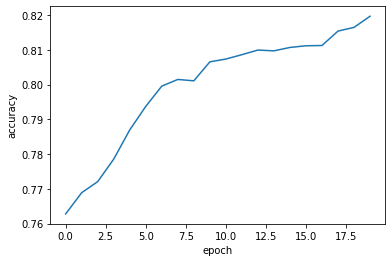

In [23]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
#에포크마다 검증 손살을 계산하기 위해 keras모델의 fit() 메서드에 validation_data 매개변수로 검증 데이터를 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


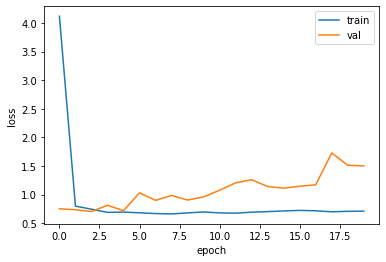

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()      #점점 과대적합이 일어남.

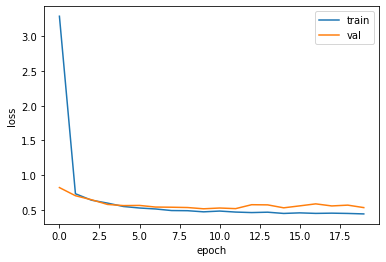

In [31]:
#Adam 옵티마이저를 이용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()      #과대적합이 훨씬 줄은 것을 확인

__드롭아웃__은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막는다.<br/>
뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지는 사용자가 정해야 하는 하이퍼파라미터이다.

In [32]:
#드롭아웃 객체를 전달하여 층을 추가
model = model_fn(keras.layers.Dropout(0.3))     # 30%를 드롭아웃
model.summary()     #드롭아웃 층은 입력과 출력의 크기가 같고 모델 파라미터가 없다.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 한다. 다행이도 tensorflow 와 keras는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃 층을 사용하지 않는다.

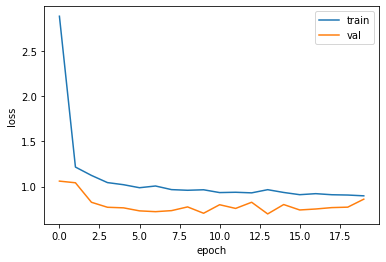

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

keras 모델은 save_weights() 메서드를 통해 훈련된 모델의 파라미터를 저장할 수 있다.<br/>이 메서드는 tensorflow의 체크포인트 포맷으로 저장하지만 파일의 확장자가 .'h5'인 경우 HDF5포맷으로 저장한다.

In [34]:
#에포크 횟수를 10으로 다시 지정하여 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.save_weights('model-weights.h5')      #훈련된 모델의 파라미터를 저장

In [36]:
model.save('model-whole.h5')      #모델 구조와 모델 파라미터를 함께 저장

In [37]:
!ls -al *.h5      #.h5 확장자 데이터들의 정보를 가져옴

-rw-r--r-- 1 root root 332480 May 28 13:56 model-weights.h5
-rw-r--r-- 1 root root 981736 May 28 13:57 model-whole.h5


In [38]:
#저장한 파라미터만을 이용하여 모델 학습
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')      #저장한 모델의 파라미터를 불러옴

In [39]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)      #numpy의 argmax()를 이용해 predict() 메서드 결과에서 가장 큰 값을 고름
print(np.mean(val_labels == val_target))

0.7159166666666666


In [40]:
#모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)      #같은 모델을 저장하고 다시 불러왔기 때문에 동일한 정확도를 얻음

375/375 [==============================] - 1s 1ms/step - loss: 0.7303 - accuracy: 0.7159


[0.7302983403205872, 0.7159166932106018]

__콜백__은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callback 패키지 아래에 있는 클래스들이다. fit() 매서드 callback 매개변수에 리스트로 전달하여 사용한다.

In [41]:
#ModelCheckpoint 콜백 사용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')      #ModelCheckpoint() 콜백은 최상의 검증 점수를 만드는 모델을 저장한다.
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [43]:
#ModelCheckpoint를 통해 저장한 모델로 예측을 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.7265 - accuracy: 0.7170


[0.7264713644981384, 0.7170000076293945]

ModelCheckpoint를 사용하면 최상의 검증점수를 편하게 이용할 수 있지만, 여전히 정해진 에포크만큼의 훈련을 반복한다.<br/>
앞서 얻은 그래프에서 알 수 있듯이 검증 점수가 상승하기 시작하면 그 이후부터는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다. 이 때 훈련을 중지한다면 컴퓨터 자원과 시간을 아낄 수 있을것이다.<br/>
이렇게 과대 적합이 시작되기 전에 훈련을 미리 중지하는 것을 __조기종료__라고 부르며 딥러닝 분야에서 널리 이용된다.

In [44]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
#patience : 지정 횟수 연속으로 검증 점수가 향상되지 않으면 훈련을 종료. restore_best_weights : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [45]:
#몇 번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)      #6번 째 에포크에서 중지되었다.

5


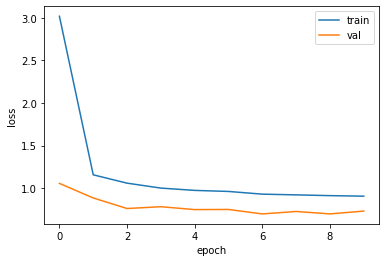

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [47]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.9379 - accuracy: 0.6172


[0.9379205703735352, 0.6171666383743286]